# Colonialism, Male Patriarchism and mad women in English Literature
# Comparison between _Jane Eyre_ and _The Problem of Thor Bridge_


## Chun Li


As we know, literature is the reflection of real life. In European countries and America of the 19th and 20th century, the roles and situation of women were really restrictive, someone of them got the chance to work, but the most common job for women in that time background was being a wife. But being a wife is not that easy and safe. 
In a man-oriented world, the definition of women in English and American literature would be influenced, the male patriachism shaped the description of women characters in literature. And as “the empire on which the sun never sets”, England has had colonies all over the world, which indulged the proud sentiment of English people. Under the stress of colonialism and male partriachism, the literary image of foreign women who didn’t speak English, is worthy to pay attention to, especially when they were from colonies and were compared with English, white and educated women. Charlotte Brontë has created a very classic "mad woman" named Bertha in _Jane Eyre_, she was the wife of Mr. Rochester,described as a monster but not a human. She was a Jamaican, married Mr. Rochester when she was young and beautiful, but after she went mad, she was locked in the attic and was unknown by the external world. Feminist literary criticism in 20th century described the group of women which were abandoned by husbands and excluded away from normal family life. Similarly, in _The Casebook of Sherlock Holmes_, it's a story named_ The Problem of Thor Bridge, there is also a "mad woman", who is Mrs. Gibson, she was from Brazil, she was also a beautiful lady when she was young, but her husband cannot stand her “tropical” temper when the time passed and her beauty faded away. She suffered from her husband's bad treatment and was jealous terribly of her husband's attention to their English, young governess, Miss Dunbar. In the end she committed a suicide and made it look like a murder by Miss Dunbar. The plot and characters in common of the two stories make me intereted, the two "mad women" both from South America, which was the colonies of western countries, and there are also two gentle, smart and educated English women in the two stories, Jane Eyre and Miss Dunbar, and they are younger then the "mad women". Meanwhile, they are not only beautiful and fair, but also can influence the male characters by their intelligence and language. Interestingly, they were more “sexless” and “purer” than those two crazy wives, both of them were unmarried, and took a serious attitude in the communication with their male characters. In Jane Eyre, Jane was engaged to Mr. Rochester, but she acted cool to him before the wedding; Miss Dunbar chose to reject her employer’s propose of being his mistress. They’ve been taken revenge by the two wives in some degree, Bertha made Jane cannot marry Mr. Rochester indirectly; Mrs. Gibson frame Miss Dunbar as a murderer. It’s interesting to find so many phenomena in common and I would like to assemble the description of two pairs of female characters and to find out if there are any connections. So I want to discovery the different emotions of author to female characters from different culture background. The hypothesis is: English literature in 19th or 20th century has the intention to describe women from colonies as more negative than English women.
Feminist criticism in literature believed that every awakened woman got the madness innately. Among them, those mad women have taken space in female literature. _The Madwoman in the Attic_, famous pioneer feminist criticism book which was written by Sandra M. Gilbert and Susan Gubar, took the mad women as the other side of the personality of “good women”, madness could be imaged as the revolt of the male power in the house. 

In [1]:
# Import all your libraries here, and only here, please.
from collections import Counter
import pandas as pd
import numpy as np
from nltk import word_tokenize, pos_tag,ngrams,sent_tokenize
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
import json
from sklearn.decomposition import PCA
from nltk.text import Text
# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
import spacy
nlp = spacy.load('en')
nlp = spacy.load('en_core_web_lg')
import nltk
from nltk import text
stemmer = nltk.stem.LancasterStemmer()

C:\Users\dell\pythoncourse\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\dell\pythoncourse\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
jane=open('JaneEyre.md',encoding='UTF-8').read().lower()
janeParts=jane.split('%%%%%') #Open _Jane Eyre_ and split it into parts.

In [3]:
bertha=janeParts[25]+janeParts[26]+janeParts[27] 
# Bertha is only involved in these three chapters, she burned the house in CHPATER 29 but there are only three or four sentences.To control its length, I choose Chapter25,26 and 27.

In [4]:
thor=open('The Problem of Thor Bridge.md',encoding='UTF-8').read().lower() #To open The Problem of Thor Bridge.

In [5]:
berthaTokens=word_tokenize(bertha)
thorTokens=word_tokenize(thor)

In [6]:
berthaSents = nltk.sent_tokenize(bertha) 
thorSents = nltk.sent_tokenize(thor)

In [7]:
berthaStems=[]
for word in berthaTokens:
    stem = stemmer.stem(word)
    berthaStems.append(stem)
berthaStemsDict={}
for stem in berthaStems:
    if stem not in berthaStemsDict:
        berthaStemsDict[stem]=1
    else:
        berthaStemsDict[stem]=berthaStemsDict[stem]+1

In [8]:
berthaSentenceLengths = []
for sent in berthaSents: 
    berthaSentenceLengths.append(len(sent))

In [9]:
thorSentenceLengths = []
for sent in thorSents: 
    thorSentenceLengths.append(len(sent))

In [10]:
berthaave=sum(berthaSentenceLengths)/len(berthaSentenceLengths)
berthaave    # To count the average length of sentences.

135.00865265760197

In [11]:
thorave=sum(thorSentenceLengths)/len(thorSentenceLengths)
thorave

74.01455604075691

It seems like that Jane Eyre has the longer sentence than the short case from Sherlock Holmes so far.

In [12]:
berthaCounts=Counter(berthaTokens)
thorCounts= Counter(thorTokens)

In [13]:
berthanesses={}               # To find the word frequences of the two texts.
thornesses={}
for word in berthaCounts:
    berthaCount = berthaCounts[word]
    berthaProportion = berthaCount / len(berthaTokens)
for word in thorCounts:
    thorCount = thorCounts[word]
    thorProportion = thorCount / len(thorTokens)

    berthaness = (berthaProportion-thorProportion)*100
    thorness = (thorProportion-berthaProportion)*100
    berthanesses[word] = berthaness

In [14]:
frequencies=pd.DataFrame([berthaCounts,thorCounts],index=['Jane Eyre','Sherlock Holmes'])
frequencies = frequencies.fillna(0)
frequencies = frequencies.T

In [15]:
frequencies['berthaP'] = (frequencies['Jane Eyre'] / len(berthaTokens)) * 100
frequencies['thorP'] = (frequencies['Sherlock Holmes'] / len(thorTokens)) * 100

In [16]:
frequencies['berthaness'] = frequencies['berthaP'] - frequencies['thorP']
frequencies['thorness'] = frequencies['thorP'] - frequencies['berthaP']

In [17]:
frequencies.sort_values('berthaness', ascending=False)

,Jane Eyre,Sherlock Holmes,berthaP,thorP,berthaness,thorness
:,385.0,3.0,1.569571,0.026051,1.543520,-1.543520
i,952.0,271.0,3.881120,2.353248,1.527873,-1.527873
“,359.0,0.0,1.463574,0.000000,1.463574,-1.463574
;,359.0,1.0,1.463574,0.008684,1.454890,-1.454890
”,342.0,0.0,1.394268,0.000000,1.394268,-1.394268
",",1553.0,584.0,6.331281,5.071205,1.260076,-1.260076
and,683.0,215.0,2.784459,1.866968,0.917492,-0.917492
my,337.0,64.0,1.373884,0.555749,0.818135,-0.818135
me,274.0,55.0,1.117045,0.477596,0.639449,-0.639449
you,454.0,155.0,1.850870,1.345953,0.504917,-0.504917


Interesting finding: Not for the hypothesis, but _Jane Eyre_ got bigger proportion of  ":" and """" than the ones of _The Problem of Thor Bridge_, what means there are more  coversation in _Jane Eyre_. That may due to _Jane Eyre_ is a romantic novel, so it will need more conversations to reveal the emotion of characters and the story changes. Instead, _The Problem of Thor Bridge_ is a detective novel, and the story is told in reverse, so there are fewer conversation.

In [18]:
chapter1=janeParts[1]  #To name the points for PCA.
chapter2=janeParts[2]
chapter3=janeParts[3]
chapter4=janeParts[4]
chapter5=janeParts[5]
chapter6=janeParts[6]
chapter7=janeParts[7]
chapter8=janeParts[8]
chapter9=janeParts[9]
chapter10=janeParts[10]
chapter11=janeParts[11]
chapter12=janeParts[12]
chapter13=janeParts[13]
chapter14=janeParts[14]
chapter15=janeParts[15]
chapter16=janeParts[16]
chapter17=janeParts[17]
chapter18=janeParts[18]
chapter19=janeParts[19]
chapter20=janeParts[20]
chapter21=janeParts[21]
chapter22=janeParts[22]
chapter23=janeParts[23]
chapter24=janeParts[24]
chapter25=janeParts[25]
chapter26=janeParts[26]
chapter27=janeParts[27]
chapter28=janeParts[28]
chapter29=janeParts[29]
chapter30=janeParts[30]

In [19]:
tfidf = TfidfVectorizer(use_idf=False)
tf = tfidf.fit_transform([chapter1, chapter2,chapter3,chapter4,chapter5,chapter6,chapter7,chapter8,chapter9,chapter10,chapter11,chapter12,chapter13,chapter14,chapter15,chapter16,chapter17,chapter18,chapter19,chapter20,chapter21,chapter22,chapter23,chapter24,chapter25,chapter26,chapter27,chapter28,chapter29,chapter30,thor])
tf

<31x11661 sparse matrix of type '<class 'numpy.float64'>'
	with 44616 stored elements in Compressed Sparse Row format>

In [20]:
allRaw=([chapter1,chapter2,chapter3,chapter4,chapter5,chapter6,chapter7,chapter8,chapter9,chapter10,chapter11,chapter12,chapter13,chapter14,chapter15,chapter16,chapter17,chapter18,chapter19,chapter20,chapter21,chapter22,chapter23,chapter24,chapter25,chapter26,chapter27,chapter28,chapter29,chapter30,thor])

In [21]:
allTf = tfidf.fit_transform(allRaw)
allTfDense = allTf.todense()
allTextLabels=['chapter1', 'chapter2', 'chapter3','chapter4','chapter5','chapter6','chapter7','chapter8','chapter9','chapter10','chapter11','chapter12','chapter13','chapter14','chapter15','chapter16','chapter17','chapter18','chapter19','chapter20','chapter21','chapter22','chapter23','chapter24','chapter25','chapter26','chapter27','chapter28','chapter29','chapter30','THOR']
allWordLabels=tfidf.get_feature_names()

In [22]:
allTf.shape

(31, 11661)

In [23]:
tfidf=TfidfVectorizer(use_idf=False,max_features=800)

In [24]:
pca = PCA(2)
pcaOut = pca.fit_transform(allTfDense)

In [25]:
pcaOut

array([[-0.14104095, -0.09432644],
       [-0.09505281,  0.06069398],
       [-0.03511972,  0.03175582],
       [ 0.02501092,  0.13442556],
       [-0.2512167 ,  0.01579421],
       [-0.00836407,  0.12887744],
       [-0.20065348,  0.00459069],
       [ 0.01239841,  0.24567866],
       [-0.13080602,  0.08800502],
       [-0.09129882,  0.02630593],
       [-0.08706831,  0.04262525],
       [-0.08793125, -0.05348822],
       [ 0.03110824, -0.14194051],
       [ 0.25025152, -0.00465157],
       [-0.00953803, -0.12840918],
       [-0.02319988,  0.06827036],
       [-0.12518359,  0.04083489],
       [-0.20137979, -0.02861043],
       [ 0.19135533, -0.02311784],
       [ 0.06713742, -0.20123535],
       [ 0.04075671,  0.1530341 ],
       [ 0.09285154,  0.08915911],
       [ 0.2180065 , -0.03304948],
       [ 0.25584899,  0.021158  ],
       [ 0.11360108, -0.09547445],
       [-0.02542856, -0.1675753 ],
       [ 0.20823394,  0.04444911],
       [-0.06946492, -0.02597487],
       [ 0.11724434,

In [26]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

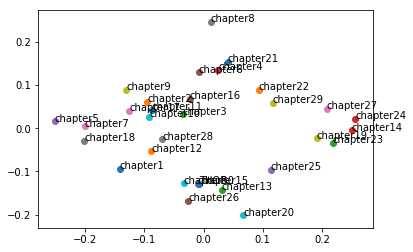

In [27]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allTextLabels[i], (xs[i], ys[i]))
plt.rcParams['figure.figsize'] = [18, 10]

These points are disperse, Chapter 25 and 26 are close to Thor, but Chapter 27 is kind of far away from them.

In [28]:
def typeTokenRatio(tokens): 
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes/numTokens

In [29]:
typeTokenRatio(berthaTokens)

0.1653960618043948

In [30]:
typeTokenRatio(thorTokens)

0.16906912122264675

In [31]:
lengths = [len(text) for text in [bertha,thor]]
berthatext=Text(berthaTokens)
thortext=Text(thorTokens)

In [32]:
ttrs = [typeTokenRatio(text[:100000]) for text in [berthatext,thortext]]
labels = [berthaTokens[0],thorTokens[3]]

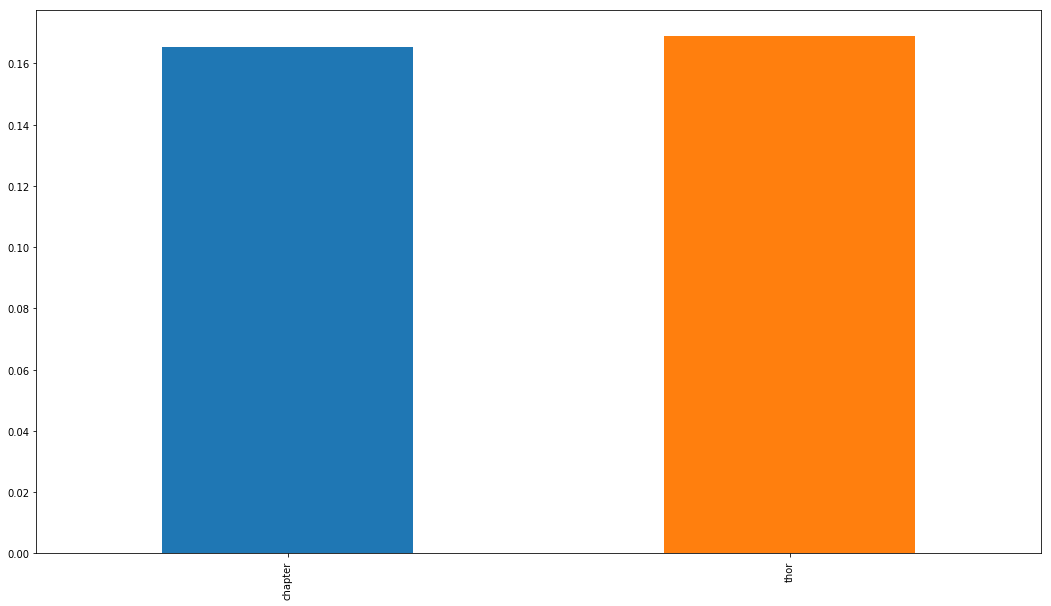

In [33]:
pd.Series(ttrs, index=labels).plot(kind='bar')

It seems like that Doyle and Bronte got the similar writing style, so their works are comparable. It makes sense because they were both English writers and their time backgrounds were similar, when England had a high international status. 

I'd like to use concordance to extract sentences for two pairs of female characters, after my close reading, I confirmed a series of names for them. For example, Bertha was called as "wife"," Mrs. Rochester", sometimes even "monster". Looking through the sentences can help me get further, clearer impression of the characters to be researched, which helps me feel the attitude of authors better.

In [34]:
berthatext.concordance('wife')   

Displaying 24 of 24 matches:
e civil wars , and of elizabeth , his wife . our place was taken at the communio
t thou have this woman for thy wedded wife ? ” —when a distinct and near voice s
evious marriage . mr. rochester has a wife now living. ” my nerves vibrated to t
don. ” “ and you would thrust on me a wife ? ” “ i would remind you of your lady
on , merchant , and of antoinetta his wife , a creole , at -- - church , spanish
hat the woman mentioned therein as my wife is still living. ” “ she was living t
r , whether or not this gentleman ’ s wife is still living ? ” “ courage , ” urg
ess . i now inform you that she is my wife , whom i married fifteen years ago , 
visit mrs. poole ’ s patient , and my wife ! you shall see what sort of a being 
oth acrid and desolate . “ that is my wife , ” said he . “ such is the sole conj
 will answer for you—because i have a wife already , you would reply.—i guess ri
o hundred a year to live here with my wife , as you term that fearful hag : grac

In [35]:
berthatext.concordance('bertha')

Displaying 5 of 5 matches:
england , was married to my sister , bertha antoinetta mason , daughter of jonas
most as soon strike a woman as you . bertha mason is mad ; and she came of a mad
re silent on family secrets before . bertha , like a dutiful child , copied her 
ow ! you won ’ t kiss the husband of bertha mason ? you consider my arms filled 
 those propensities entailed on me ! bertha mason , the true daughter of an infa


In [36]:
berthatext.concordance('mrs.')

Displaying 18 of 18 matches:
ffix them , or to have them affixed . mrs. rochester ! she did not exist : she w
 has disturbed you . let me hear it . mrs. fairfax has said something , perhaps 
sophie , it was not leah , it was not mrs. fairfax : it was not—no , i was sure 
rshal : none but mr. rochester and i. mrs. fairfax stood in the hall as we passe
urhood , sir , and i never heard of a mrs. rochester at thornfield hall. ” i saw
 lives ! you say you never heard of a mrs. rochester at the house up yonder , wo
all to come up to the house and visit mrs. poole ’ s patient , and my wife ! you
be wanted to-day. ” at our entrance , mrs. fairfax , adèle , sophie , leah , adv
d its head and face . “ good-morrow , mrs. poole ! ” said mr. rochester . “ how 
rple face , —those bloated features . mrs. poole advanced . “ keep out of the wa
èle had tapped at the door ; not even mrs. fairfax had sought me . “ friends alw
board the lower windows : i ’ ll give mrs. poole two hundred a year to live here

In [37]:
berthatext.concordance('sister')

Displaying 3 of 3 matches:
-shire , england , was married to my sister , bertha antoinetta mason , daughter
 years ago , —bertha mason by name ; sister of this resolute personage , who is 
ed interest he takes in his wretched sister , and also in a dog-like attachment 


In [38]:
berthatext.concordance('animal')

Displaying 1 of 1 matches:
d and growled like some strange wild animal : but it was covered with clothing ,


In [39]:
berthatext.concordance('devil')

Displaying 3 of 3 matches:
escaped mason ’ s white lips . “ the devil is in it if you can not answer disti
the last . i am little better than a devil at this moment ; and , as my pastor 
er , ” whispered mason . “ go to the devil ! ” was his brother-in-law ’ s recom


In [40]:
berthatext.concordance('miss')

Displaying 1 of 1 matches:
hing about her money ; but he told me miss mason was the boast of spanish town f


In [41]:
berthatext.concordance('jane')

Displaying 25 of 25 matches:
.v . ) , —or rather , not i , but one jane rochester , a person whom as yet i kn
 you : but i think you are feverish , jane : both your cheek and hand are burnin
old to seek your shepherd , did you , jane ? ” “ i wanted you : but don ’ t boas
. “ take a seat and bear me company , jane : please god , it is the last meal bu
he prospect of a journey before you , jane ? is it the thoughts of going to lond
t , ” i said . “ yes : but remember , jane , you promised to wake with me the ni
ou uttered that word— ‘ very well , ’ jane ! what a bright spot of colour you ha
 charged ? ” “ this is hypochondria , jane . you have been over-excited , or ove
flushed . “ give me your confidence , jane , ” he said : “ relieve your mind of 
passing ? ” “ no. ” “ you puzzle me , jane : your look and tone of sorrowful aud
se dreams weigh on your spirits now , jane , when i am close to you ? little ner
ecause i love you. ’ do you love me , jane ? —repeat it. ” “ i do , sir—i do , w

In [42]:
berthatext.concordance('girl')

Displaying 3 of 3 matches:
 with something at least human . this girl , ” he continued , looking at me , “ 
 hand on my shoulder ) : “ this young girl , who stands so grave and quiet at th
lmost a bride , was a cold , solitary girl again : her life was pale ; her prosp


In [43]:
berthatext.concordance('governess')

Displaying 3 of 3 matches:
 under this roof only as adèle ’ s governess ; if ever i say a friendly word to
only one way—adèle must have a new governess , sir. ” “ oh , adèle will go to s
 i feared adèle never would have a governess to stay if she knew with what inma


In [44]:
berthatext.concordance('janet')

Displaying 6 of 6 matches:
“ but is there anything the matter , janet , that you come to meet me at such a
al happiness ! you say you love me , janet : yes—i will not forget that ; and y
e , he continued , cheerily— “ now , janet , i ’ ll explain to you all about it
re thoughts : chase dull care away , janet . don ’ t you hear to what soft whis
quiringly into my eyes , “ how is my janet now ? ” “ the night is serene , sir 
usly you smiled to and at yourself , janet ! there was much sense in your smile


In [45]:
berthaBlob=TextBlob(bertha)
berthaSents=sent_tokenize(bertha)

In [46]:
berthaSlist=[]
for sentence in (berthaSents):
        if 'bertha'in sentence:             
            berthaSlist.append(sentence)
        if 'mrs. rochester'in sentence:
            berthaSlist.append(sentence)
        if 'wife' in sentence:
            berthaSlist.append(sentence)
        if 'monster'in sentence:
            berthaSlist.append(sentence)
        if 'sister'in sentence:
            berthaSlist.append(sentence)
        if 'mad'in sentence:
            berthaSlist.append(sentence)
        if 'mad-woman'in sentence:
            berthaSlist.append(sentence)
        if 'animal'in sentence:
            berthaSlist.append(sentence)
        if 'devil'in sentence:
            berthaSlist.append(sentence)
        if 'miss'in sentence:
            berthaSlist.append(sentence)

In [47]:
BERTHASentiments=[TextBlob(sent).sentiment.polarity
                  for sent in berthaSlist]

In [48]:
mrsbertha=pd.Series(BERTHASentiments) # To save the space, the sentiment lines of individuals will be omitted, they will be showed in the group figures.

In [49]:
for sent,sentiment in zip(berthaSlist,BERTHASentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

0.0 mrs. rochester!
0.13113636363636363 “i am feverish: i hear the wind blowing: i will go out of doors and feel it.” it was not only the hu
0.12023809523809524 “you did right to hold fast to each other,” i said: as if the monster-splinters were living things, 
0.65 step on my boot-toe; give me both hands: mount!” i obeyed: joy made me agile: i sprang up before him
-0.05555555555555555 as john took his horse, and he followed me into the hall, he told me to make haste and put something
-0.029166666666666664 i walked a little while on the pavement after tea, thinking of you; and i beheld you in imagination 
-0.18333333333333335 the gale still rising, seemed to my ear to muffle a mournful under-sound; whether in the house or ab
-0.05000000000000001 i thought, sir, that you were on the road a long way before me; and i strained every nerve to overta
0.005555555555555559 i must be careful of you, my treasure: nerves like yours were not made for rough handling.” “sir, de
0.25 my conjecture ha

After looking through these sentences, I found most of them have the negative meanings. Below are the sentences for Jane. Her addersses are fewer than Bertha. Most of the time she was called as "Jane" by Mr. Rochester, who called her most frequently. Because they were very much in love before the wedding, so sometimes Mr. Rochester called her with some nicknames.

In [50]:
janeSlist=[]
for sentence in (berthaSents):
        if 'jane'in sentence: 
            janeSlist.append(sentence)
        if 'girl' in sentence:
            janeSlist.append(sentence)
        if 'governess'in sentence:
            janeSlist.append(sentence)
        if 'janet'in sentence:
            janeSlist.append(sentence)

In [51]:
JANESentiments=[TextBlob(sent).sentiment.polarity
                  for sent in janeSlist]

In [52]:
msjane=pd.Series(JANESentiments)

In [53]:
for sent,sentiment in zip(janeSlist,JANESentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

0.0 ),—or rather, not i, but one jane rochester, a person whom as yet i knew not.
0.0 he checked himself in his exultation to demand, “but is there anything the matter, janet, that you c
0.0 he checked himself in his exultation to demand, “but is there anything the matter, janet, that you c
-0.01666666666666668 yes, you are dripping like a mermaid; pull my cloak round you: but i think you are feverish, jane: b
0.0 you wandered out of the fold to seek your shepherd, did you, jane?” “i wanted you: but don’t boast.
-0.0263888888888889 “take a seat and bear me company, jane: please god, it is the last meal but one you will eat at thor
0.0 “is it because you have the prospect of a journey before you, jane?
0.0 “sir, have you finished supper?” “yes, jane.” i rang the bell and ordered away the tray.
0.14722222222222223 “yes: but remember, jane, you promised to wake with me the night before my wedding.” “i did; and i w
0.0 i wish this present hour would never end: who knows with what fate the 

In [54]:
mrsberthaNormed = mrsbertha/np.linalg.norm(mrsbertha)
msjaneNormed = msjane/np.linalg.norm(msjane)

In [55]:
sum(msjane)/len(msjane)

0.04655671076946038

In [56]:
sum(mrsbertha)/len(mrsbertha)

-0.04467499714380093

The pair of numbers for sentiments of different characters are for the hypothesis very much, they are almost opposite to each other, which shows they are the two sides of women. Jane stands for the positive side and Bertha stands for the negative. Charlotte Brontë was influenced by the colonialism and male patriarchism of that background in some degree, having Bertha as negative example as a woman, Jane would get more agreements by the society of the day, her love with Mr. Rochester would be more comprehensive.

But sometimes sentences which include character's name may not reflect emotion directly, such as "What's up, Jane?", it's a sentence without direct sentiments. Maybe adjectives in these sentences could express the writers' intention better. I will extract all adjectives of the sentencelist above, and put them in a fixed, meaningless sentence of "It's a _ thing", and calculate the sentiments of these adjectives again.

In [57]:
aa=str(berthaSlist)
bb=word_tokenize(aa) 
cc=pos_tag(bb)
dd= [pair[0] for pair in cc
               if pair[1] in ['JJ', 'JJR', 'JJS'] and pair[0].isalpha()] 

In [58]:
Counter(dd).most_common(20)

[('i', 11),
 ('mad', 8),
 ('fifteen', 6),
 ('hideous', 6),
 ('first', 5),
 ('such', 5),
 ('secret', 5),
 ('real', 4),
 ('low', 4),
 ('ferndean', 4),
 ('spanish', 4),
 ('lunatic', 4),
 ('quiet', 4),
 ('single', 4),
 ('infamous', 4),
 ('new', 3),
 ('more', 3),
 ('last', 3),
 ('old', 3),
 ('deep', 3)]

Most of the adjectives for Bertha are negative, like "mad", "infamous", "hideous".

In [59]:
makeBerthalist=[] # To build a list of new sentences including adjectives.
for word in dd: 
    makeBerthalist.append("It's a "+word+" thing"+".")

In [60]:
berthaSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in makeBerthalist]

In [61]:
for sent,sentiment in zip(makeBerthalist,berthaSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

-0.1 It's a feverish thing.
-0.1 It's a feverish thing.
0.8 It's a great thing.
0.13636363636363635 It's a new thing.
-0.3 It's a late thing.
0.0 It's a third thing.
0.5 It's a more thing.
-0.125 It's a other thing.
-0.05 It's a long thing.
-0.1875 It's a little thing.
0.0 It's a actual thing.
0.0 It's a mournful thing.
0.25 It's a first thing.
-0.8 It's a doubtful thing.
0.0 It's a doleful thing.
0.0 It's a last thing.
-0.05 It's a long thing.
-0.1 It's a inarticulate thing.
-0.1 It's a careful thing.
-0.1 It's a rough thing.
0.2 It's a real thing.
-0.16666666666666666 It's a previous thing.
0.2 It's a real thing.
0.0 It's a correct thing.
0.1 It's a old thing.
0.0 It's a civil thing.
0.3 It's a distinct thing.
0.1 It's a near thing.
0.0 It's a same thing.
0.0 It's a firmer thing.
0.0 It's a deep thing.
0.0 It's a low thing.
-0.3333333333333333 It's a subtle thing.
0.0 It's a lady thing.
0.0 It's a nasal thing.
0.0 It's a fifteen thing.
0.0 It's a ferndean thing.
0.0 It's a spanish th

In [62]:
madbertha=pd.Series(berthaSentiments)

In [63]:
ee=str(janeSlist)
ff=word_tokenize(ee)
gg=pos_tag(ff)
hh=[pair[0] for pair in gg
               if pair[1] in ['JJ', 'JJR', 'JJS'] and pair[0].isalpha()] 

In [64]:
Counter(hh).most_common(20)

[('i', 18),
 ('little', 7),
 ('last', 5),
 ('more', 5),
 ('long', 4),
 ('new', 4),
 ('pale', 4),
 ('such', 3),
 ('mad', 3),
 ('real', 3),
 ('certain', 3),
 ('whole', 2),
 ('narrow', 2),
 ('large', 2),
 ('dark', 2),
 ('wish', 2),
 ('full', 2),
 ('ll', 2),
 ('sombre', 2),
 ('serene', 2)]

In [65]:
makeJanelist=[] #The same steps for Jane.
for word in hh: 
    makeJanelist.append("It's a "+word+" thing"+".")

In [66]:
janeSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in makeJanelist]

In [67]:
for sent,sentiment in zip(makeJanelist,janeSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

0.0 It's a i thing.
0.0 It's a i thing.
0.0 It's a i thing.
-0.1 It's a feverish thing.
0.25 It's a hot thing.
0.0 It's a last thing.
-0.05 It's a long thing.
-0.3 It's a least thing.
0.3333333333333333 It's a extraordinary thing.
0.0 It's a present thing.
0.0 It's a next thing.
0.0 It's a hypochondria thing.
0.0 It's a i thing.
0.7 It's a good thing.
0.0 It's a apprehensive thing.
0.13636363636363635 It's a new thing.
0.13636363636363635 It's a new thing.
0.0 It's a sorrowful thing.
-0.05 It's a long thing.
-0.1 It's a inarticulate thing.
0.10000000000000002 It's a clear thing.
0.1 It's a soft thing.
0.0 It's a solemn thing.
0.0 It's a glorious thing.
0.0 It's a i thing.
0.2 It's a whole thing.
-0.05 It's a strange thing.
-0.2 It's a narrow thing.
0.0 It's a scared thing.
0.0 It's a i thing.
0.0 It's a last thing.
0.13636363636363635 It's a new thing.
0.21428571428571427 It's a large thing.
-0.30000000000000004 It's a thick thing.
-0.15 It's a dark thing.
0.0 It's a wish thing.
0.0 It

In [68]:
clamjane=pd.Series(janeSentiments) # I name the figure as "clamjane, because she is really clam!"

In [69]:
madberthaNormed = madbertha/np.linalg.norm(madbertha)
clamjaneNormed = clamjane/np.linalg.norm(clamjane)

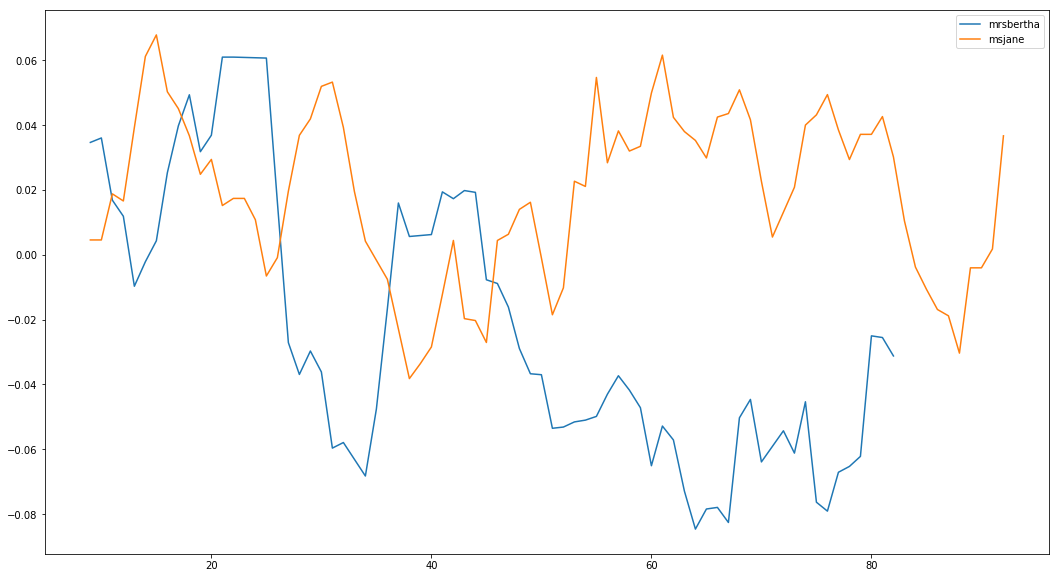

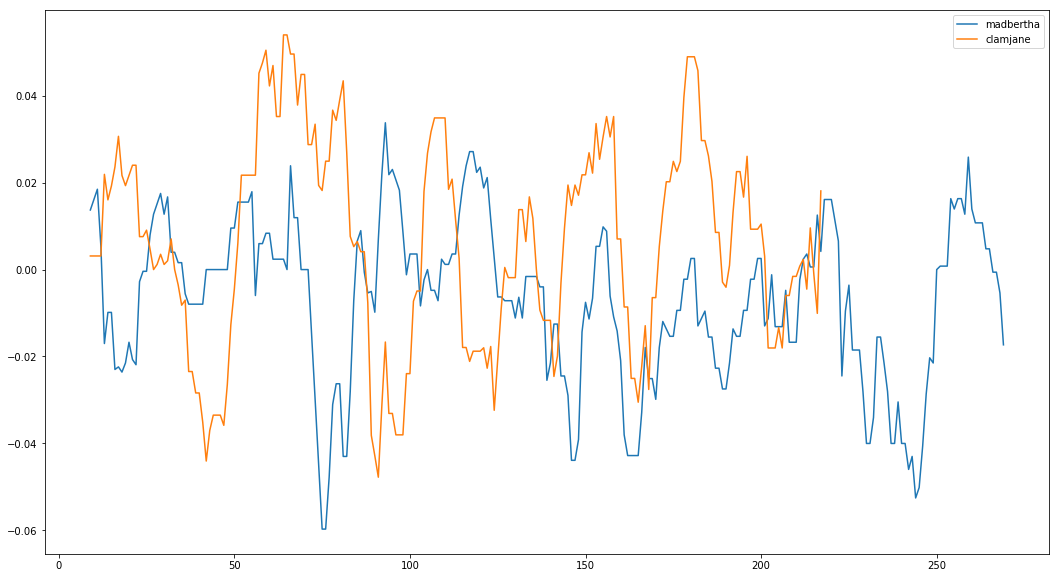

In [70]:
df = pd.DataFrame([pd.Series(mrsberthaNormed).rolling(window=10).mean(), pd.Series(msjaneNormed).rolling(window=10).mean()], index=['mrsbertha', 'msjane']).T
df.plot()
df = pd.DataFrame([pd.Series(madberthaNormed).rolling(window=10).mean(), pd.Series(clamjaneNormed).rolling(window=10).mean()], index=['madbertha', 'clamjane']).T
df.plot()

# Figure1: Sentiments analysis of descriptions of Bertha and Jane (upper: respective sentiments analysis of sentences; lower: respective sentiments analysis of adjectives.)

There are obvious difference of the orange (jane) and blue (bertha) line above, the blue lines are under the 0 line most of the time, especially in the upper graph, the two lines are nearly symmetry, which reveals the clear attitude of Charlotte Brontë.

Now I will repeat my operation just like _Jane Eyre_ to _The Problem of Thor Bridge_.

In [71]:
thortext.concordance('wife')

Displaying 11 of 11 matches:
lready heard of the tragic end of his wife ? '' `` of course . i remember it now
d formidable character . he married a wife , the victim of this tragedy , of who
 state . then as to the tragedy . the wife was found in the grounds nearly half 
bson is an attractive person . if his wife dies , who more likely to succeed her
over his private iniquities . but his wife was his chief victim . he was brutal 
s path , and when i remember that his wife may have been an obstacle and an obje
 go deeper than is needful . i met my wife when i was gold-hunting in brazil . m
 is worth . there is no doubt that my wife was bitterly jealous . there is a sou
 as any body-jealousy , and though my wife had no cause -- and i think she under
ery way . he may well have wished his wife out of the road . and these americans
our true relations with mr. gibson 's wife . '' `` she hated me , mr. holmes . s


In [72]:
thortext.concordance('pinto')

Displaying 1 of 1 matches:
i was gold-hunting in brazil . maria pinto was the daughter of a government off


In [73]:
thortext.concordance('mrs.')

Displaying 3 of 3 matches:
ted to the ground . `` that was where mrs. gibson 's body lay . i marked it by t
t she had made an appointment to meet mrs. gibson at the bridge . beyond this sh
e that night , i received a note from mrs. gibson in the morning . it lay on the


In [74]:
thortext.concordance('dunbar')

Displaying 23 of 23 matches:
ut i know beyond all doubt that miss dunbar is innocent . you know the facts -- 
exact relations between you and miss dunbar ? '' the gold king gave a violent st
er , that the relations between miss dunbar and me do n't really touch this case
ed as ever . `` then came miss grace dunbar . she answered our advertisement and
he might have planned to murder miss dunbar -- or we will say to threaten her wi
inst such a supposition ? '' `` miss dunbar herself . '' `` well , perhaps . '' 
g that . '' `` you 've not seen miss dunbar . she is a wonderful fine woman in e
no weapon . the short note from miss dunbar was clutched in her left hand . '' `
or bridge at nine o'clock . '' `` g. dunbar . was that not so ? '' `` yes , sir 
o ? '' `` yes , sir . '' `` did miss dunbar admit writing it ? '' `` yes , sir .
er , for i should desire to see miss dunbar before we go farther . '' mr. neil g
e o'clock . on the other hand , miss dunbar , as i understand it , admits that s

In [75]:
thortext.concordance('governess')

Displaying 5 of 5 matches:
e unfortunate as a very attractive governess superintended the education of two
l very clear . but why suspect the governess ? '' `` well , in the first place 
 that very place and signed by the governess . how 's that ? finally there is t
t what were his relations with the governess , and how did you discover them ? 
wered our advertisement and became governess to our two children . perhaps you 


In [76]:
thortext.concordance('girl')

Displaying 2 of 2 matches:
 you have tried to ruin a defenceless girl who was under your roof . some of you
ter , she was aware that this english girl exerted an influence upon my mind and


In [77]:
gibsonSlist=[]
# The list for "the mad woman."
for sentence in (thorSents):
        if 'wife'in sentence: 
            gibsonSlist.append(sentence)
        if 'mrs. gibson'in sentence:
            gibsonSlist.append(sentence)
        if 'victim' in sentence:    
            gibsonSlist.append(sentence)
        if 'amazon'in sentence:
            gibsonSlist.append(sentence)
        if 'victim'in sentence:
            gibsonSlist.append(sentence)
        if 'brazilian'in sentence:
            gibsonSlist.append(sentence)
        if 'tropical'in sentence:
            gibsonSlist.append(sentence)
        if 'maria pinto'in sentence:
            gibsonSlist.append(sentence)
        if 'poor lady'in sentence:
            gibsonSlist.append(sentence)
        if 'unhappy woman'in sentence:
            gibsonSlist.append(sentence)

In [78]:
GIBSONSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in gibsonSlist]

In [79]:
for sent,sentiment in zip(gibsonSlist,GIBSONSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

-0.375 possibly you have already heard of the tragic end of his wife?"
0.14642857142857144 he married a wife, the victim of this tragedy, of whom i know nothing save that she was past her pri
0.14642857142857144 he married a wife, the victim of this tragedy, of whom i know nothing save that she was past her pri
0.14642857142857144 he married a wife, the victim of this tragedy, of whom i know nothing save that she was past her pri
-0.23333333333333334 the wife was found in the grounds nearly half a mile from the house, late at night, clad in her dinn
0.19999999999999998 if his wife dies, who more likely to succeed her than the young lady who had already by all accounts
-0.07500000000000001 but his wife was his chief victim.
-0.07500000000000001 but his wife was his chief victim.
-0.07500000000000001 but his wife was his chief victim.
0.0 she was a creature of the tropics, a brazilian by birth, as no doubt you know."
0.0 "tropical by birth and tropical by nature.
0.08333333333333333 "wel

In [80]:
mrsgibson=pd.Series(GIBSONSentiments)

In [81]:
dunbarSlist=[]
# The list for English girl. 
for sentence in (thorSents):
        if 'governess 'in sentence: 
            dunbarSlist.append(sentence)
        if 'dunbar'in sentence:
            dunbarSlist.append(sentence)
        if 'young lady' in sentence:    
            dunbarSlist.append(sentence)
        if 'girl'in sentence:
            dunbarSlist.append(sentence)
        if 'best woman'in sentence:
            dunbarSlist.append(sentence)
        if 'grace'in sentence:
            dunbarSlist.append(sentence)

In [82]:
DUNBARSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in dunbarSlist]

In [83]:
for sent,sentiment in zip(dunbarSlist,DUNBARSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

-0.10000000000000002 it was a wild morning in october, and i observed as i was dressing how the last remaining leaves wer
0.5 dear mr. sherlock holmes: i can't see the best woman god ever made go to her death without doing all
0.5 i can't explain things -- i can't even try to explain them, but i know beyond all doubt that miss du
0.14642857142857144 he married a wife, the victim of this tragedy, of whom i know nothing save that she was past her pri
0.19999999999999998 if his wife dies, who more likely to succeed her than the young lady who had already by all accounts
0.25 "what were the exact relations between you and miss dunbar?"
0.05 "then i can assure you that our relations were entirely and always those of an employer towards a yo
0.2 i can assure you, however, that the relations between miss dunbar and me don't really touch this cas
0.0 "then came miss grace dunbar.
0.0 "then came miss grace dunbar.
0.0 she answered our advertisement and became governess to our two children.
0.1 

In [84]:
msdunbar=pd.Series(DUNBARSentiments)

In [85]:
mrsgibsonNormed = mrsgibson/np.linalg.norm(mrsgibson) 
msdunbarNormed = msdunbar/np.linalg.norm(msdunbar)

In [86]:
sum(mrsgibson)/len(mrsgibson)

-0.0006394557823129239

In [87]:
sum(msdunbar)/len(msdunbar)

0.07185776942355888

The contrast has become less obvious... Mrs. Gibson is not "that bad" here, is it because it was the 20th century, and Doyle got a more objective opinion and more sympathies to women? 

In [88]:
ii= str(gibsonSlist)
jj=word_tokenize(ii)
kk=pos_tag(jj)
ll=[pair[0] for pair in kk
               if pair[1] in ['JJ', 'JJR', 'JJS'] and pair[0].isalpha()] 

In [89]:
Counter(ll).most_common(20)

[('young', 4),
 ('tropical', 4),
 ('i', 4),
 ('deep', 4),
 ('more', 3),
 ('unfortunate', 3),
 ('attractive', 3),
 ('chief', 3),
 ('unconventional', 2),
 ('unbusinesslike', 2),
 ('clear', 2),
 ('accused', 2),
 ('english', 2),
 ('vindictive', 2),
 ('own', 2),
 ('innocent', 2),
 ('second', 2),
 ('worse', 2),
 ('sudden', 2),
 ('tragic', 1)]

In [90]:
makeGibsonlist=[]
for word in ll: 
    makeGibsonlist.append("It's a "+word+" thing"+".")

In [91]:
gibsonSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in makeGibsonlist]

In [92]:
for sent,sentiment in zip(makeGibsonlist,gibsonSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

-0.75 It's a tragic thing.
0.5 It's a more thing.
-0.5 It's a unfortunate thing.
0.8 It's a attractive thing.
0.1 It's a young thing.
0.5 It's a more thing.
-0.5 It's a unfortunate thing.
0.8 It's a attractive thing.
0.1 It's a young thing.
0.5 It's a more thing.
-0.5 It's a unfortunate thing.
0.8 It's a attractive thing.
0.1 It's a young thing.
0.0 It's a likely thing.
0.1 It's a young thing.
0.0 It's a chief thing.
0.0 It's a chief thing.
0.0 It's a chief thing.
0.0 It's a brazilian thing.
0.0 It's a tropical thing.
0.0 It's a tropical thing.
0.0 It's a i thing.
0.0 It's a i thing.
0.0 It's a told thing.
0.0 It's a unconventional thing.
0.0 It's a unbusinesslike thing.
0.10000000000000002 It's a clear thing.
0.0 It's a deep thing.
0.0 It's a accused thing.
0.0 It's a unconventional thing.
0.0 It's a unbusinesslike thing.
0.10000000000000002 It's a clear thing.
0.0 It's a deep thing.
0.0 It's a accused thing.
0.85 It's a beautiful thing.
0.0 It's a deep thing.
0.375 It's a rich thing.

In [93]:
angrygibson=pd.Series(gibsonSentiments) # I name the graph as "angrygibson because her had a fiery temper in story."

In [94]:
mm= str(dunbarSlist)
nn= word_tokenize(mm)
oo= pos_tag(nn)
pp=[pair[0] for pair in oo
               if pair[1] in ['JJ', 'JJR', 'JJS'] and pair[0].isalpha()] 

In [95]:
Counter(pp).most_common(20)

[('miss', 15),
 ('young', 9),
 ('i', 3),
 ('last', 2),
 ('possible', 2),
 ('more', 2),
 ('curious', 2),
 ('wild', 1),
 ('remaining', 1),
 ('solitary', 1),
 ('best', 1),
 ('innocent', 1),
 ('unfortunate', 1),
 ('attractive', 1),
 ('likely', 1),
 ('exact', 1),
 ('worse', 1),
 ('defenceless', 1),
 ('frantic', 1),
 ('aware', 1)]

In [96]:
makeDunbarlist=[]
for word in pp: 
    makeDunbarlist.append("It's a "+word+" thing"+".")

In [97]:
dunbarSentiments=[TextBlob(sent).sentiment.polarity
                  for sent in makeDunbarlist]

In [98]:
for sent,sentiment in zip(makeDunbarlist,dunbarSentiments):
    print(sentiment,sent.replace('\n',' ')[:100])

0.1 It's a wild thing.
0.0 It's a last thing.
0.0 It's a remaining thing.
0.0 It's a solitary thing.
1.0 It's a best thing.
0.0 It's a possible thing.
0.0 It's a miss thing.
0.5 It's a innocent thing.
0.5 It's a more thing.
-0.5 It's a unfortunate thing.
0.8 It's a attractive thing.
0.1 It's a young thing.
0.0 It's a likely thing.
0.1 It's a young thing.
0.25 It's a exact thing.
0.1 It's a young thing.
0.0 It's a miss thing.
0.0 It's a miss thing.
0.0 It's a miss thing.
0.1 It's a young thing.
0.1 It's a young thing.
0.0 It's a i thing.
-0.4 It's a worse thing.
0.0 It's a defenceless thing.
0.0 It's a frantic thing.
0.0 It's a i thing.
0.25 It's a aware thing.
0.0 It's a english thing.
0.0 It's a miss thing.
0.1 It's a young thing.
0.0 It's a possible thing.
0.5 It's a more thing.
0.0 It's a such thing.
0.0 It's a miss thing.
0.0 It's a short thing.
0.0 It's a miss thing.
0.0 It's a left thing.
0.0 It's a miss thing.
-0.125 It's a other thing.
0.0 It's a miss thing.
0.0 It's a i thing.

In [99]:
innocentdunbar=pd.Series(dunbarSentiments) #Because Miss Dunbar is innocent.

In [100]:
angrygibsonNormed = angrygibson/np.linalg.norm(angrygibson) 
innocentdunbarNormed = innocentdunbar/np.linalg.norm(innocentdunbar)

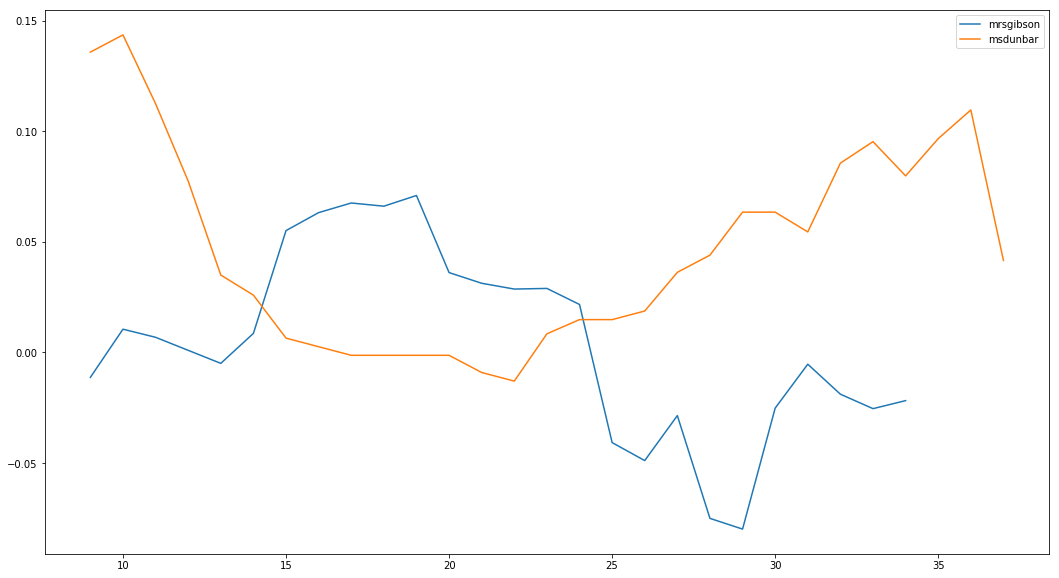

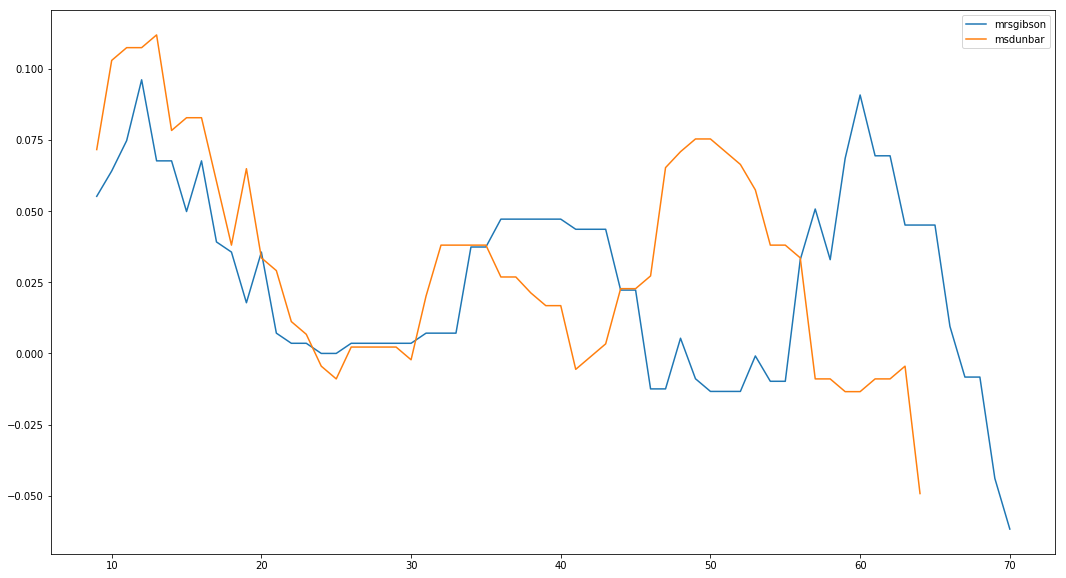

In [101]:
df = pd.DataFrame([pd.Series(mrsgibsonNormed).rolling(window=10).mean(), pd.Series(msdunbarNormed).rolling(window=10).mean()], index=['mrsgibson', 'msdunbar']).T
df.plot()
df = pd.DataFrame([pd.Series(angrygibsonNormed).rolling(window=10).mean(), pd.Series(innocentdunbarNormed).rolling(window=10).mean()], index=['mrsgibson', 'msdunbar']).T
df.plot()

# Figure 2: Sentiments analysis of descriptions of Mrs. Gibson and Miss Dunbar (upper: respective sentiments analysis of sentences; lower: respective sentiments analysis of adjectives.)

The contrasts are still obvious, but they are not as sharp as the ones in _Jane Eyre_, the mad woman, Mrs. Gibson went mad for reasons: her husband was tried of her and didn't respect her at all, she had an unhappylife and she was jealous of Miss Dunbar. Her experience has made her look like a "human" and a "woman" more, and her behaviors are more comprehensible than Bertha.

# Conclusion: The description between the "good women" and "mad women" in Jane Eyre and The Problem of Thor Bridge is almost opposite, but the description of the latter one is like more objective. After 75 years, the cognition of foreign women may become more objective. Not like Bertha who even acted as a monster, Mrs Gibson acted more normally and more like a "person", and a woman.

Sadly, either Bertha or Mrs. Gibson, they had no chance to speak for themselves. After using concordance, no complete sentences were discovered as they were said by them. Bertha, being locked in attic, looked like a monster in a jail, could only just roar and attack others. She was dangerous and mad, but also poor and helpless. She has got sympathy of generations of readers. _Wide Sargasso Sea_, by Jean Rhys, is a book which imagines Bertha's youth and explores the power relationships between men and women and develops postcolonial themes, such as racism, displacement and assimilation. Mrs. Gibson were dead at the very beginning of the story, all we know is that she hated Miss Dunbar and said something really bad to Miss Dunbar before her suicide, but what did she say? What did she look like as a mother, a woman? Doyle didn't show them to us, but he has talked about her husband treated her terribly and she was really unhappy, which could be seen as a progress to Brontë. In Jane Eyre, there are no words about Bertha's feelings. But essentially, in that writing background, no one cared about why they went mad. They were taken from their own homeland, thinking they met true love. They had no friends or families in England, they were not good at English or English etiquette, they may don't like English food, and didn't know how to rule a manor or be a respectful hostess. The only dependence was husband, but as time passed they weren't as beautiful as before, their husbands started tried of them and moved on to flirt with their English young governess, the loneliness and sadness would turn to madness and jealousy. In the end, they became the "the mad women in the attic".